## Kinodata-3D data splits and filtering


### RMSD estimates and filtering
The Kinodata-3D dataset can be associated with a confidence model that estimates the
quality of docked poses in terms of their docking RMSD.

More information regarding the RMSD prediction model and training data is found [here](add_repo_link).
The raw data already encodes the precomputed RMSD estimates.

In [1]:
from kinodata.data.dataset import KinodataDocked

dataset = KinodataDocked()

/Users/joschka/mambaforge/envs/kinodata/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<AxesSubplot: ylabel='Count'>

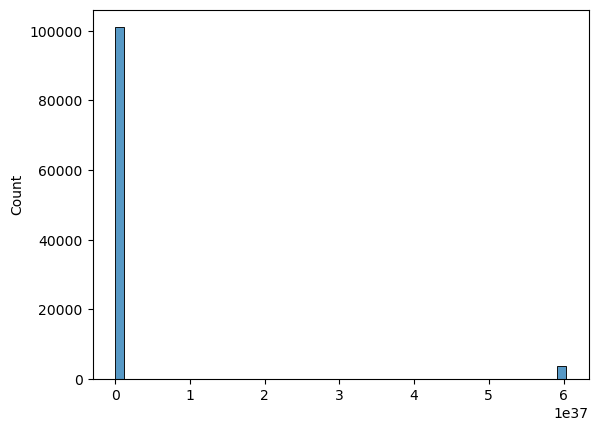

In [2]:
import seaborn as sns

sns.histplot(
    x=dataset.data.predicted_rmsd.numpy(),
    bins=50
)

### Pre-computed splits and preprocessed dataset
The splits used in [the Kinodata-3D publication](add_paper_link) can be downloaded here and
guaranteed to be compatible with [this preprocessed version of the dataset](add_download_link_to_pth).

The following code snippet briefly demonstrates how to recreate the data modules we used to train the published models.

In [7]:
from kinodata.data.data_module import make_kinodata_module
import kinodata.configuration as config

data_config = config.get(
    "data",
    "training"
)

The relevant configuration options are
- `filter_rmsd_max_value`, type `float`
- `split_type`, one of `"random-k-fold"`, `"scaffold-k-fold"` or `"pocket-k-fold"`
- `k_fold`, type `int`, number of folds
- `index`, type `int`, determines train/test assignment of folds

You can set them by hand, or adapt the configuration based on [these files](add_yaml_configurations_for_all_experiments).

In [9]:
data_config["filter_rmsd_max_value"] = 2
data_config["split_type"] = "scaffold-k-fold"
data_config["k_fold"] = 5
data_config["index"] = 0

In [10]:
data_module = make_kinodata_module(data_config)

Creating data module:
    split:Split[int](train=19364, val=2420, test=2421, source=/Users/joschka/projects/kinodata-docked-rescore/data/processed/filter_predicted_rmsd_le2.00/scaffold-k-fold/1:5.csv)
    train_transform:Compose([
  PerturbAtomPositions(ligand, 0.10),
  PerturbAtomPositions(pocket, 0.10),
  PerturbAtomPositions(complex, 0.10),
  AddDistancesAndInteractions(defaultdict(<function AddDistancesAndInteractions.__init__.<locals>.<lambda> at 0x15b1e8c10>, {('ligand', 'ligand'): 6.0, ('ligand', 'pocket'): 6.0, ('pocket', 'ligand'): 6.0}))
])
    val_transform:Compose([
  AddDistancesAndInteractions(defaultdict(<function AddDistancesAndInteractions.__init__.<locals>.<lambda> at 0x15b1e8c10>, {('ligand', 'ligand'): 6.0, ('ligand', 'pocket'): 6.0, ('pocket', 'ligand'): 6.0}))
])
